<a href="https://colab.research.google.com/github/ccrister/Data-Science/blob/main/CSC466_project_chris_cristerna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Report**
Intro/Description:
The purpose of the project I worked on was to develop two models for predicting share prices for Gamestop, modify the parameters of the models to see if any effects on performance arose and finally to pit the two models against each other and see how they perform relative to one another.


The first model that was required to meet the goals of the project was the recurrent neural network which uses the LSTM(Long Short Term Memory) architecture. This model was developed with the aid of TensorFlow and Keras. Generally speaking an RNN can be thought of as a computer algorithm unique in that it has a notion of memory that is developed via a series of data or information that is being fed through a channel or network. This RNN that was developed for the project consists of four layers, three LSTM layers and a single dense layer that is the brain responsible for developing the share price prediction or forecast. The RNN developed makes predictions by first looking at publicly available share information from the past to learn about trends which it then uses to make a projection about the share price one day in the future.



The decision tree model on the otherhand is a recursive algorithm that fractures the dataset such that each one of the dataset entries goes through a sequence of processing until reaching a leaf in the tree. It is at this point at which a forecasted price or prediction can be made.


Results:
I ran multiple ticker symbols or stocks through both models to get an idea of how accurate the predictions could be and found significant performance variations contingent on the company. This makes intuitive sense as companies like any other public figure or entity are bound to be influenced by external events and the publics perception. I also discovered the importance of 'hyper-parameters' in the RNN as I modified the number of epochs and units which all came with varying but most importantly significant fluctuations in performance.

Future Work:
I would have liked to explore the effects of news headlines on share prices but due to time constraints my research was cut short. That said, I greatly enjoyed working on this project, and will surely continue to explore KDD and it's seemingly infinite means of novelizing the seemingly mundane dataset.


In [ ]:
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing the dependencies


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt


In [ ]:
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf


brk = yf.Ticker('GME')

data = brk.history(period="max", auto_adjust=True)

data.tail()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-19,37.435001,39.209999,36.587502,37.924999,12828000,0.0,0.0
2022-07-20,38.500000,40.407501,38.349998,39.687500,11400400,0.0,0.0
2022-07-21,39.930000,40.000000,37.290001,38.367500,9277600,0.0,0.0
2022-07-22,36.880001,38.700001,34.930000,35.779999,10039800,0.0,4.0
2022-07-25,35.000000,35.509998,33.250000,33.980000,5613070,0.0,0.0


In [ ]:
data.isna().any()

Open            False
High            False
Low             False
Close           False
Volume          False
Dividends       False
Stock Splits    False
dtype: bool

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5147 entries, 2002-02-13 to 2022-07-25
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          5147 non-null   float64
 1   High          5147 non-null   float64
 2   Low           5147 non-null   float64
 3   Close         5147 non-null   float64
 4   Volume        5147 non-null   int64  
 5   Dividends     5147 non-null   float64
 6   Stock Splits  5147 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 321.7 KB


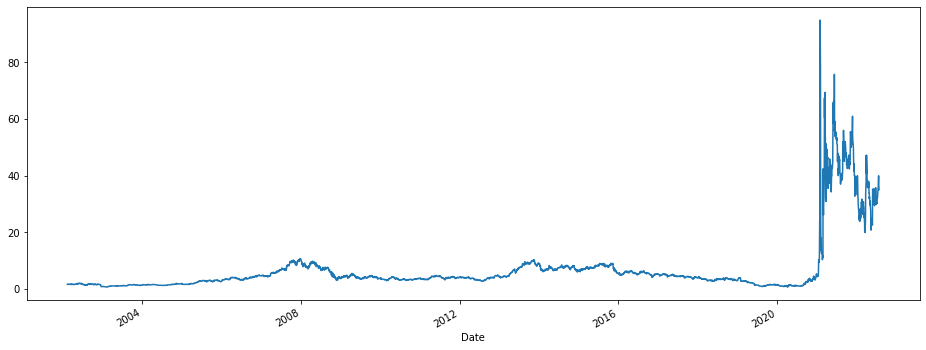

In [ ]:
data['Open'].plot(figsize=(16,6))


In [ ]:
data['Volume'] = data['Volume'].astype(float)

The line below is takes a slice consisting of seven days and we calculates the mean of the previous seven days and iterates to calculates the next mean for the next seven days

In [ ]:
data.rolling(7).mean().tail(20)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-27,33.921429,35.167500,32.657500,33.804644,1.087291e+07,0.0,0.000000
2022-06-28,34.138214,35.240357,32.718214,33.756429,1.038931e+07,0.0,0.000000
2022-06-29,33.948571,34.905714,32.477857,33.317858,9.601543e+06,0.0,0.000000
2022-06-30,33.275357,34.233928,31.843571,32.675715,8.773886e+06,0.0,0.000000
2022-07-01,32.648929,33.535357,31.231428,32.138572,8.599486e+06,0.0,0.000000
2022-07-05,31.929643,32.767143,30.598572,31.360358,8.507086e+06,0.0,0.000000
2022-07-06,31.132857,31.835357,29.950000,30.725357,7.506114e+06,0.0,0.000000
2022-07-07,30.705000,31.780000,29.753929,30.919286,1.044440e+07,0.0,0.000000
2022-07-08,30.549643,31.827857,29.762143,31.067857,1.138577e+07,0.0,0.000000


Below we have the 'Open' price rolling mean represented by the orange graph. The blue graph represents the opening share price

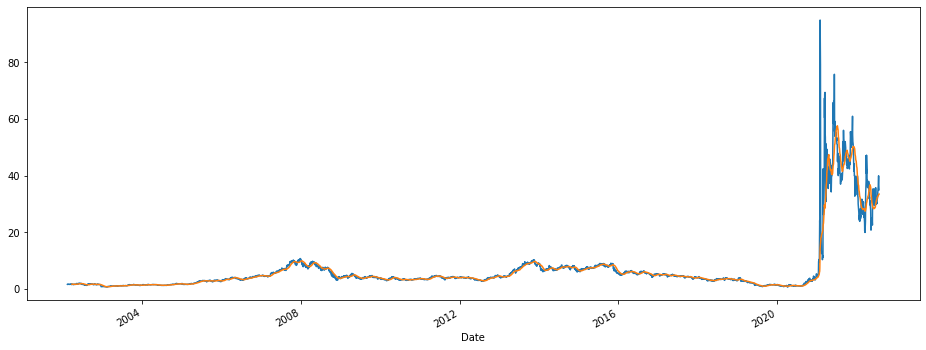

In [ ]:
data['Open'].plot(figsize=(16,6))
data.rolling(window=30).mean()['Close'].plot() #

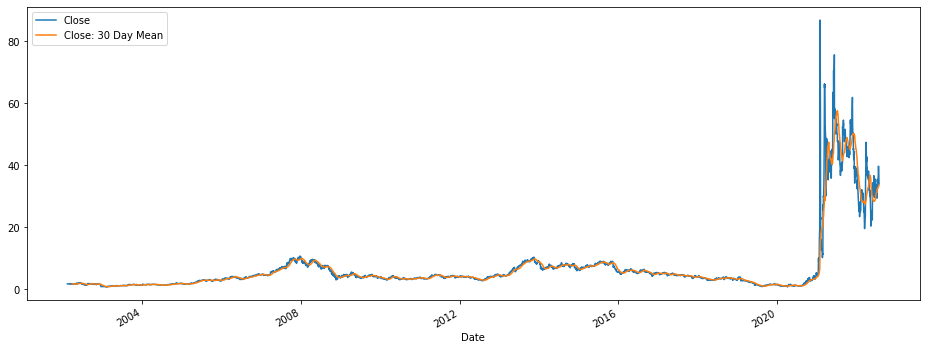

In [ ]:
#similar to the above graph but now instead charting the 30 day rolling mean of the closing prices against daily closing prices
data['Close: 30 Day Mean']= data['Close'].rolling(window=30).mean()
data[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

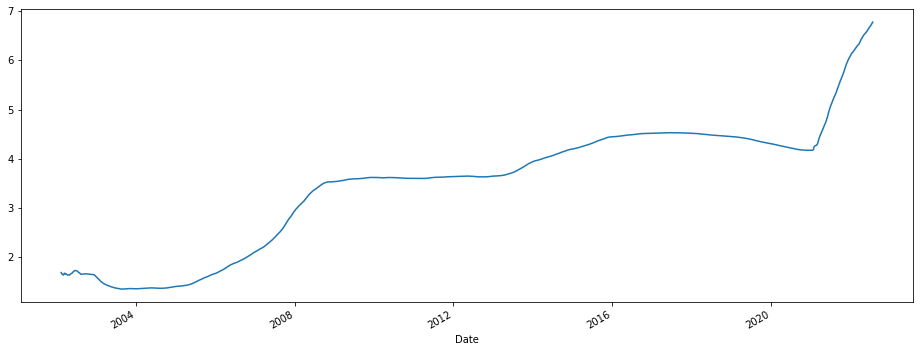

In [ ]:
data['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

#Start
Creating our training set dataFrame below






In [ ]:
training_set = data['Open']
training_set=pd.DataFrame(training_set)

In [ ]:
data.isna().any()

Open                  False
High                  False
Low                   False
Close                 False
Volume                False
Dividends             False
Stock Splits          False
Close: 30 Day Mean     True
dtype: bool

In [ ]:
#Feature Scaling being performed by MinMaxScaler library
#this takes features and transforms them by scaling each to a set range where the "feature" set or range is
#determined by the second line..
#therefore the feature range is from 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

The preprocessing above reduces the data , then we perform a data normalization, and finnaly we clean the data by filling in the missing values


and then we "integrate" the data files after the dataset is transformed into a clean dataset..

the data set is then divided into training and testing sets so we can perform evaluations of the model at the end


below what we are doing is creating a data structure with 60 time stamps and one output

X_train.append: taking data from day 1 to day 60 and make predictions on the 61st day, then we take data from day number 2 to day number 61 and make a prediction on the 62nd day.

in other words "i" goes from 60 to the end of the range which is 1258

Note about the 60 day span:
decreasing to something like 5-10 days makes the model sensitive to short term trends whereas increasing makes it senstive for long term trends



In [ ]:
X_train = []
y_train = []

#how many days we look into the past to decide or base our models predicted price for the next day
prediction_days = 60

for i in range(prediction_days,len(training_set_scaled)):
  X_train.append(training_set_scaled[i-prediction_days:i,0])
  y_train.append(training_set_scaled[i,0]) # this gives us the prediction on the 61st day
X_train, y_train = np.array(X_train), np.array(y_train)

#Reshaping below
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

Now what do we do when we take into account the beggining of the time series to the rolling point of the value

**Feature Extraction**

The purpose of this phase is to select only the important features which we will fed into the neural network(in other words we will be choosing feautures from ['date', 'high', 'low', 'close', 'volume'])

In [ ]:
# Below we simply import the necessary Keras libraries needed to build our RNN
#keras itself is simply tensorflows high level API for building and training models
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#below we initialize the RNN
model = Sequential()

# Training the Neural Network

In this stage of the process our data is fed to the neural network and trained to make predictions assigning random biases and weights to the model

The LST model itself is composed of:
   1.a sequential input layer
   2.followed by 3 LSTM inpit layers
   3.and a dense layer with activation
   4.and finnally an output layer with the linear    activation function
  

In [ ]:

#adding the 1st LSTM layer and performing some normalization on the data
model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))



#adding the 2nd LSTM layer
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

#adding the 3rd LSTM layer
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))

#adding the 4th LSTM layer
model.add(LSTM(units = 50))
model.add(Dropout(0.2))


#adding the output layer
model.add(Dense(units = 1))



#Notes about Dropout: Purpose and Effects
Dropout is a method of reducing overfitting in our neural network

Dropouts are used as the help to make the neurons more robust giving them the ability to predict a trend without focusing on any one particular neruron

#Notes about the Optimizer below:
The type of the optimizer selected can have drastic effects on the speed of the algorithm as it determines the speed at which the algorithm converges on the minimum value

The "Adam" optimizer selected combines the benefits of two other optimizers (ADAgrad and RMSprop)



In [ ]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

#performing the fitting between our RNN and the training dataset
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
159/159 [==============================] - 38s 132ms/step - loss: 0.0022
Epoch 2/50
159/159 [==============================] - 18s 116ms/step - loss: 0.0015
Epoch 3/50
159/159 [==============================] - 18s 115ms/step - loss: 0.0014
Epoch 4/50
159/159 [==============================] - 19s 122ms/step - loss: 0.0013
Epoch 5/50
159/159 [==============================] - 18s 116ms/step - loss: 0.0012
Epoch 6/50
159/159 [==============================] - 23s 146ms/step - loss: 0.0010
Epoch 7/50
159/159 [==============================] - 25s 157ms/step - loss: 0.0010
Epoch 8/50
159/159 [==============================] - 19s 121ms/step - loss: 8.5923e-04
Epoch 9/50
159/159 [==============================] - 30s 188ms/step - loss: 7.4202e-04
Epoch 10/50
159/159 [==============================] - 18s 116ms/step - loss: 7.0375e-04
Epoch 11/50
159/159 [==============================] - 19s 120ms/step - loss: 7.0878e-04
Epoch 12/50
159/159 [==============================] - 23s

# Visualizing the results of the real stock prices

In [ ]:

brk2 = yf.Ticker('BRK-B')
data_test = brk2.history(period="max", auto_adjust=True)
actual_stock_price= data_test.iloc[:, 1:2].values





In [ ]:
data_test.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-19,279.000000,284.079987,278.170013,283.549988,3590200,0,0.0
2022-07-20,284.640015,286.440002,283.899994,286.040009,3877200,0,0.0
2022-07-21,287.000000,287.239990,282.089996,286.850006,3699000,0,0.0
2022-07-22,288.100006,289.399994,283.619995,285.929993,2876100,0,0.0
2022-07-25,287.209991,289.065002,285.153412,287.989990,3131043,0,0.0


In [ ]:
#data_test.info()

In [ ]:
test_data=data_test['Open']
test_data=pd.DataFrame(test_data)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6597 entries, 1996-05-09 to 2022-07-25
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    6597 non-null   float64
dtypes: float64(1)
memory usage: 103.1 KB


In [ ]:
data_total= pd.concat((data['Open'], data_test['Open']), axis = 0)
model_inputs = data_total[len(data_total) -len(data_test) -prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = sc.transform(model_inputs)
X_test =[]

#below 60 and 6651 need to be changed to prediction_days and model_inputs + 1
for i in range(prediction_days,len(model_inputs)):
  X_test.append(model_inputs[i-prediction_days:i,0])

X_test =np.array(X_test)
X_test =np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
#predicted_stock_price.info()
predicted_stock_price.head(10)

,0
0,37.639500
1,29.939758
2,24.807005
3,23.030117
4,23.357698
5,23.906893
6,23.826134
7,23.335485
8,23.232191
9,23.456686


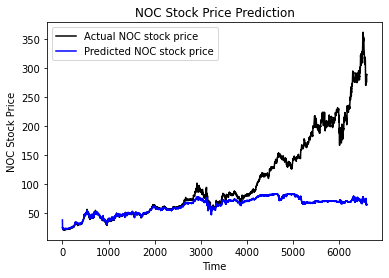

In [ ]:
#using matplot lib to visualize the results of the predicted and the actual

plt.plot(actual_stock_price,color = 'black', label = 'Actual NOC stock price')
plt.plot(predicted_stock_price,color = 'blue', label = 'Predicted NOC stock price')
plt.title('NOC Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NOC Stock Price')
plt.legend()
plt.show()

**And now.. Prediction using a Decision Tree**

In [ ]:
#Decision Tree Performance
# inspiration for the analysis below was borrowed from the link below
# https://www.kaggle.com/code/rishidamarla/stock-market-prediction-using-decision-tree/notebook
df2 = data['Close']
df2 = pd.DataFrame(df2)

future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)
df2.tail()

,Close,Prediction
Date,,
2022-07-19,37.924999,NaN
2022-07-20,39.687500,NaN
2022-07-21,38.367500,NaN
2022-07-22,35.779999,NaN
2022-07-25,33.980000,NaN


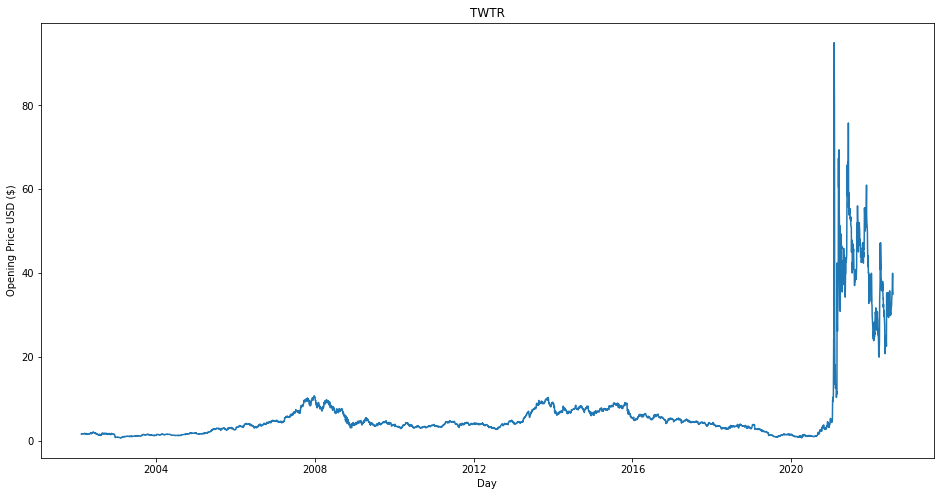

In [ ]:
plt.figure(figsize=(16,8))
plt.title('TWTR')
plt.xlabel('Day')
plt.ylabel('Opening Price USD ($)')
plt.plot(data['Open'])
plt.show()

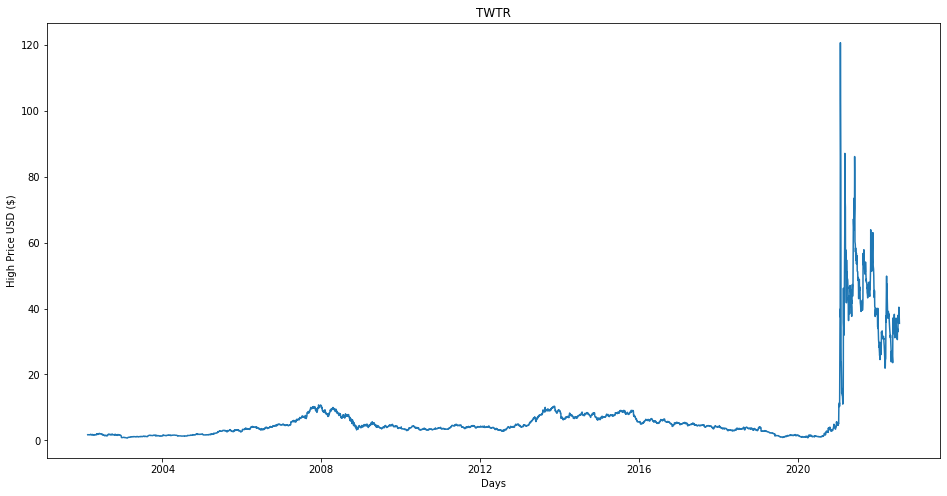

In [ ]:
plt.figure(figsize=(16,8))
plt.title('TWTR')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(data['High'])
plt.show()

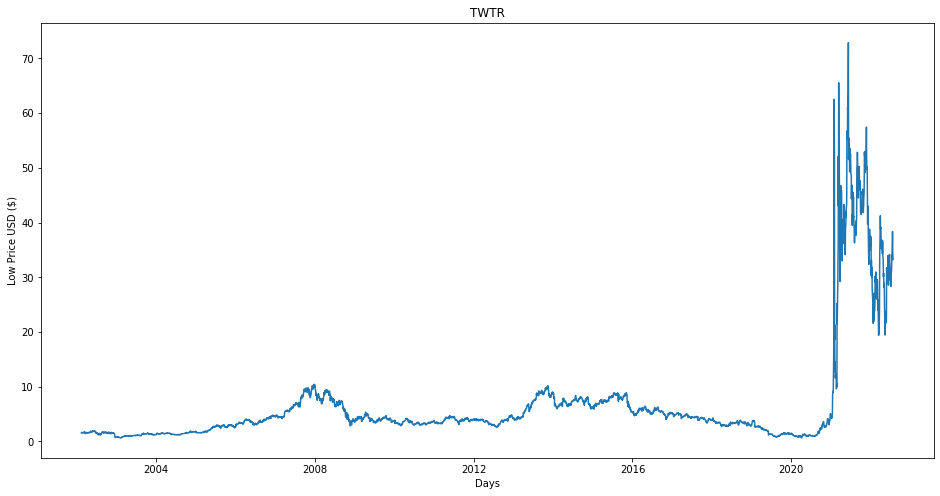

In [ ]:
plt.figure(figsize=(16,8))
plt.title('TWTR')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(data['Low'])
plt.show()

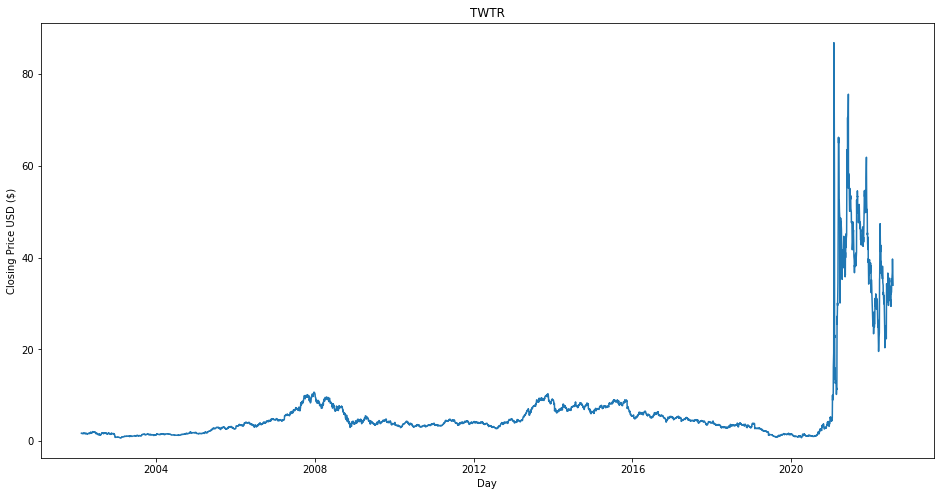

In [ ]:
plt.figure(figsize=(16,8))
plt.title('TWTR')
plt.xlabel('Day')
plt.ylabel('Closing Price USD ($)')
plt.plot(data['Close'])
plt.show()

In [ ]:
X2 = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X2)

[[ 1.6916666 ]
 [ 1.68325055]
 [ 1.67483413]
 ...
 [29.64500046]
 [30.83499908]
 [29.75499916]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
y2 = np.array(df2['Prediction'])[:-future_days]
print(y2)

[ 1.64116907  1.61592042  1.55111504 ... 38.36750031 35.77999878
 33.97999954]


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [ ]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[43.02999878],
       [43.16999817],
       [44.52500153],
       [43.95500183],
       [46.01499939],
       [45.95750046],
       [45.81999969],
       [46.50500107],
       [46.69749832],
       [46.13000107],
       [45.42750168],
       [42.45000076],
       [43.49250031],
       [44.45999908],
       [43.37749863],
       [45.71250153],
       [45.87749863],
       [50.02249908],
       [51.74750137],
       [54.58250046],
       [54.45999908],
       [53.3125    ],
       [54.65999985],
       [51.65000153],
       [49.79750061],
       [51.08000183],
       [50.52500153],
       [52.28499985],
       [51.79499817],
       [52.5       ],
       [52.52999878],
       [57.20000076],
       [61.88750076],
       [53.47499847],
       [52.94499969],
       [49.93000031],
       [50.50249863],
       [49.05250168],
       [44.95999908],
       [45.38999939],
       [43.09749985],
       [41.77999878],
       [44.45249939],
       [43.41249847],
       [38.93999863],
       [39

In [ ]:
import numpy as np
import pandas as pd

def compute_priors(y):

    priors = None
    len_values = len(y)
    value_counts = y.value_counts().sort_index()
    indices = [y.name+"="+str(v) for v in value_counts.index.tolist()]
    priors = dict(zip(indices, value_counts / len_values))

    return priors


def specific_class_conditional(x,xv,y,yv):

    probs = {}
    priors = {}
    for val in x.unique():
        binned, bins = pd.cut(y.loc[x==val], 5, retbins=True)
        bin_counts = binned.value_counts()
        bin_val = pd.cut([yv], bins)[0]

        if bin_val in bin_counts.index:
            count = bin_counts.loc[bin_val]
        else:
            count = 0

        probs[val] = count / sum(bin_counts)
        priors[val] = sum(bin_counts) / len(x)

    denominator = 0

    for i in priors.keys():
        denominator = denominator + (priors[i]*probs[i])

    classcond = probs[xv]*priors[xv] / denominator

    return classcond

def class_conditional(X,y):

    probs = {}
    for eachY in y.unique():
        for col in X.columns:
            for eachX in X[col].unique():
                probs[col + "=" + str(eachX) + "|" + y.name + "=" + str(eachY)] = specific_class_conditional(X[col], eachX, y, eachY)

    return probs

def posteriors(probs,priors,x):
    post_probs = {}
    denominator = 0

    for i in priors.keys():
        posterior_key = ""
        numerator = 1

        for eachX in x.index:
            probkey = eachX + "=" + str(x[eachX]) + "|" + i
            posterior_key += eachX + "=" + str(x[eachX]) + ","

            if probkey not in probs:
                numerator *= 0
            else:
                numerator *= probs[probkey]

        numerator*=priors[i]
        post_probs[i + "|" + posterior_key[:-1]] = numerator
        denominator+=numerator

    for key, val in post_probs.items():
        if denominator != 0:
            post_probs[key] = val / denominator
        else:
            post_probs[key] = 1 / len(list(priors.keys()))
    return post_probs


def train_test_split(X,y,test_frac=0.5):

    inxs = list(range(len(y)))
    np.random.shuffle(inxs)
    X = X.iloc[inxs,:]
    y = y.iloc[inxs]

    xsplit = round(len(X)*test_frac)
    ysplit = round(len(y)*test_frac)
    Xtrain,ytrain,Xtest,ytest = X.iloc[:xsplit, :], y.iloc[:ysplit], X.iloc[xsplit:, :], y.iloc[ysplit:]

    return Xtrain,ytrain,Xtest,ytest

def exercise_6(Xtrain,ytrain,Xtest,ytest):
    accuracy=None
    ypreds = []
    priors = compute_priors(ytrain)
    probs = class_conditional(Xtrain, ytrain)

    for i in range(len(Xtest)):

        posterior = posteriors(probs, priors, Xtest.iloc[i])
        posterior_k = max(posterior, key=posterior.get)
        predicted = round(float((posterior_k.split("|")[0]).split("=")[-1]))
        ypreds.append(predicted)

    ypreds = np.array(ypreds)
    correct = np.sum(ypreds == ytest.to_numpy())
    accuracy = correct / len(ytest)
    return accuracy

def exercise_7(Xtrain,ytrain,Xtest,ytest, npermutations = 10):

    # initialize what we are going to return
    importances = {}
    for col in Xtrain.columns:
        importances[col] = 0

    # find the original accuracy
    orig_accuracy = exercise_6(Xtrain,ytrain,Xtest,ytest)

    # now carray out the feature importance work
    for col in Xtrain.columns:
        for perm in range(npermutations):

            Xtest2 = Xtest.copy()
            Xtest2[col] = Xtest[col].sample(frac=1, replace=False).values

            new_accuracy = exercise_6(Xtrain, ytrain, Xtest2, ytest)
            feature_importance = orig_accuracy - new_accuracy
            importances[col] += feature_importance

        importances[col] = importances[col]/npermutations
    return importances

def exercise_8(Xtrain,ytrain,Xtest,ytest, npermutations = 20):
    # initialize what we are going to return
    importances = {}
    for col in Xtrain.columns:
        importances[col] = 0


    # find the original accuracy
    orig_accuracy = exercise_6(Xtrain,ytrain,Xtest,ytest)

    # now carray out the feature importance work
    for col in Xtrain.columns:
        for perm in range(npermutations):

            Xtrain2 = Xtrain.copy()
            Xtrain2[col] = Xtrain[col].sample(frac=1, replace=False).values

            new_accuracy = exercise_6(Xtrain2, ytrain, Xtest, ytest)
            feature_importance = orig_accuracy - new_accuracy
            importances[col] += feature_importance

        importances[col] = importances[col]/npermutations
    return importances



In [ ]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)


[29.60250092 29.60250092 27.91500092 24.83749962 25.75250053 26.30249977
 25.13999939 23.17250061 19.52750015 51.30500031 40.63000107 52.29999924
 22.69750023 23.54999924 30.78499985 35.25       35.59749985 35.38999939
 47.39749908 44.97499847 41.71250153 41.64500046 41.25       42.68249893
 38.39749908 39.15999985 37.5        36.54750061 36.73249817 36.21749878
 37.67499924 37.69250107 40.27999878 38.11750031 37.21250153 35.38999939
 34.55500031 41.21500015 31.89999962 32.45999908 29.60250092 31.26749992
 29.89249992 30.78499985 31.77000046 29.78249931 28.67499924 24.69750023
 23.375      20.33250046 22.39249992 24.59749985 22.95000076 24.03249931
 22.87000084 24.79750061 23.91500092 24.03249931 22.39249992 28.79249954
 32.11500168 34.30250168 31.18499947 30.35000038 33.5        33.42499924
 32.02500153 36.625      34.68249893 32.52249908 32.27249908 29.5625
 31.54249954 29.5625     31.43250084 33.78499985 31.54249954 34.61500168
 35.50500107 33.80250168 32.42250061 31.43250084 30.715

In [ ]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[36.42590594 36.53841313 37.62732942 37.16926269 38.82473084 38.77852318
 38.66802396 39.21850905 39.3732049  38.9171492  38.35260224 35.9598043
 36.79758432 37.57509175 36.70516595 38.58163561 38.71423161 42.04526285
 43.43151999 45.70979972 45.6113544  44.68919399 45.77208026 43.35316655
 41.86444816 42.89509983 42.44908701 43.86346788 43.46968966 44.03624765
 44.06035546 47.81329171 51.58028983 44.81978203 44.3938611  41.9709284
 42.43100309 41.26574745 37.97690488 38.32246442 36.48015158 35.42137311
 37.5690648  36.73329275 33.1390744  33.79202074 29.34596051 31.51776
 31.69857469 30.89494842 33.11496659 33.41632644 33.61321402 32.78547995
 32.41179361 31.64232109 31.27064579 32.77141501 33.05268605 31.65839399
 32.55242759 31.76286626 27.83715024 28.17065588 30.09734911 28.19476368
 28.02399494 27.57396313 26.45290565 25.28162001 23.72660361 23.25648145
 22.47294554 23.21429126 21.96666166 21.89433518 22.59148121 20.63465015
 21.51663138 23.73062107 24.4679478  21.94456182 21.7818

In [ ]:
predictions = tree_prediction
valid = df2[X2.shape[0]:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


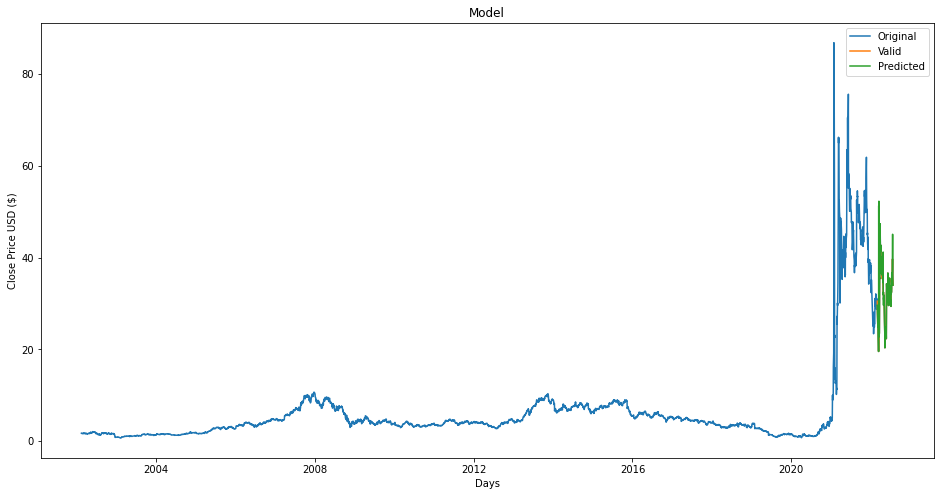

In [ ]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()